*** Predicting the Impact of the Next Recession with the Financial Indicators of US Recession 📉 ***

In this project time series forecasting is performed using the ARIMA model for data.

Here ARIMA model is fit to each dataset to see the results. Initially after the loading and preprocessing of the dataset is done. ARIMA model is fit to the clean data to forecast for the following 252 days. Then the forecasted values are visualized against the actual values and then compared.

BANK CREDIT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/Bank Credit All Commercial Banks.csv'
df = pd.read_csv(file_path)

# Convert the 'DATE' column to datetime and set it as the index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Display the first few rows of the preprocessed DataFrame
df.head()


,TOTBKCR
DATE,
1973-01-03,567.2553
1973-01-10,565.5054
1973-01-17,565.3477
1973-01-24,565.1737
1973-01-31,569.7089


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit an ARIMA model
model = ARIMA(df['TOTBKCR'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 252 business days
forecast_steps = 252
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='B')[1:]
forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Calculate in-sample predictions for evaluation
predictions = model_fit.predict(start=df.index[0], end=df.index[-1], typ='levels')
mae = mean_absolute_error(df['TOTBKCR'], predictions)
rmse = mean_squared_error(df['TOTBKCR'], predictions, squared=False)

mae, rmse, forecast[:5]  # Display the first 5 forecasted values along with MAE and RMSE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)


(9.053692457448914,
 22.002533069874364,
 2023-04-26    17332.266834
 2023-05-03    17329.568246
 2023-05-10    17326.888700
 2023-05-17    17324.228061
 2023-05-24    17321.586196
 Freq: W-WED, Name: predicted_mean, dtype: float64)

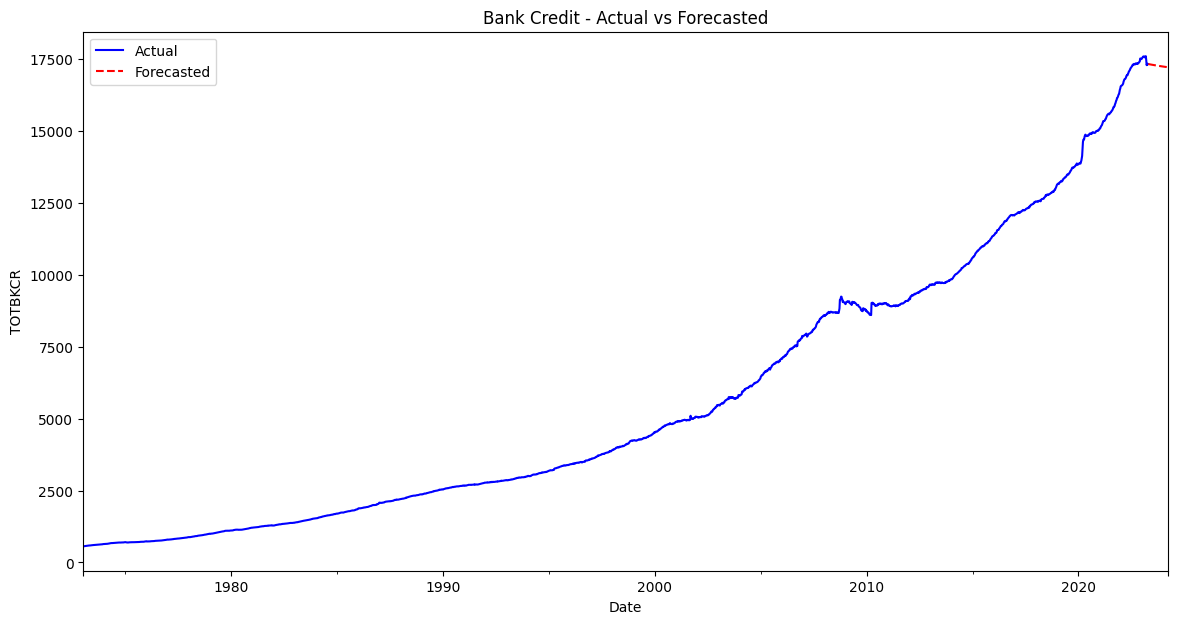

In [ ]:
import matplotlib.pyplot as plt

# Visualize the actual values and forecasted values
plt.figure(figsize=(14, 7))
df['TOTBKCR'].plot(label='Actual', color='blue')
forecast_series = pd.Series(forecast, index=forecast_index)
forecast_series.plot(label='Forecasted', linestyle='--', color='red')

plt.title('Bank Credit - Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('TOTBKCR')
plt.legend()
plt.show()


From the graph it is predicted that there is a decrease in the TOTBKCR value for the next 252 days.

NASADQ

In [ ]:
# Load the NASDAQ dataset
nasdaq_file_path = '/content/NASDAQ.csv'
nasdaq_df = pd.read_csv(nasdaq_file_path)

# Preprocess the dataset
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])
nasdaq_df['Price'] = pd.to_numeric(nasdaq_df['Price'].str.replace(',', ''), errors='coerce')
nasdaq_df.set_index('Date', inplace=True)
nasdaq_df.sort_index(inplace=True)  # Ensure the data is in chronological order

# Display the first few rows of the preprocessed DataFrame
nasdaq_df[['Price']].head()


,Price
Date,
1980-03-18,138.92
1980-03-19,139.97
1980-03-20,139.64
1980-03-21,138.80
1980-03-24,134.61


In [ ]:
# Fit an ARIMA model to the NASDAQ "Price" data
nasdaq_model = ARIMA(nasdaq_df['Price'], order=(1, 1, 1))
nasdaq_model_fit = nasdaq_model.fit()

# Forecast the next 252 business days
nasdaq_forecast_steps = 252
nasdaq_forecast_index = pd.date_range(start=nasdaq_df.index[-1], periods=nasdaq_forecast_steps+1, freq='B')[1:]
nasdaq_forecast = nasdaq_model_fit.get_forecast(steps=nasdaq_forecast_steps).predicted_mean

# Calculate in-sample predictions for evaluation
nasdaq_predictions = nasdaq_model_fit.predict(start=nasdaq_df.index[0], end=nasdaq_df.index[-1], typ='levels')
nasdaq_mae = mean_absolute_error(nasdaq_df['Price'], nasdaq_predictions)
nasdaq_rmse = mean_squared_error(nasdaq_df['Price'], nasdaq_predictions, squared=False)

nasdaq_mae, nasdaq_rmse, nasdaq_forecast[:5]  # Display the first 5 forecasted values along with MAE and RMSE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

(29.474790829028827,
 65.29645920789864,
 10875    12026.845290
 10876    12026.327024
 10877    12026.504284
 10878    12026.443657
 10879    12026.464393
 Name: predicted_mean, dtype: float64)

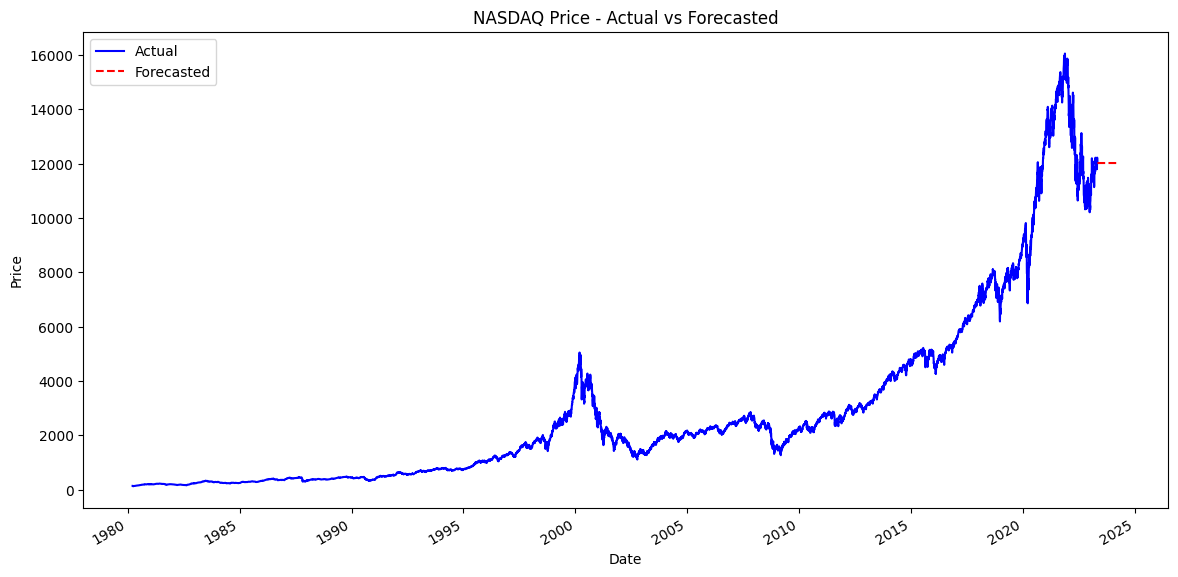

In [ ]:
# Visualize the actual values and forecasted values for the NASDAQ dataset
plt.figure(figsize=(14, 7))
nasdaq_df['Price'].plot(label='Actual', color='blue')
nasdaq_forecast_series = pd.Series(nasdaq_forecast.values, index=nasdaq_forecast_index)
nasdaq_forecast_series.plot(label='Forecasted', linestyle='--', color='red')

plt.title('NASDAQ Price - Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


NASDAQ prices remained approximately the same according to the prediction made.

10-YEAR REAL INTEREST RATE

In [ ]:
# Load the 10-Year Real Interest Rate dataset
interest_rate_file_path = '/content/10-Year Real Interest Rate.csv'
interest_rate_df = pd.read_csv(interest_rate_file_path)

# Preprocess the dataset
interest_rate_df['DATE'] = pd.to_datetime(interest_rate_df['DATE'])
interest_rate_df.set_index('DATE', inplace=True)
interest_rate_df.sort_index(inplace=True)  # Ensure data is in chronological order

# Display the first few rows of the preprocessed DataFrame
interest_rate_df.head()


,REAINTRATREARAT10Y
DATE,
1982-01-01,7.623742
1982-02-01,7.656648
1982-03-01,7.128993
1982-04-01,7.408347
1982-05-01,7.320041


In [ ]:
# Fit an ARIMA model to the 10-Year Real Interest Rate data
interest_rate_model = ARIMA(interest_rate_df['REAINTRATREARAT10Y'], order=(1, 1, 1))
interest_rate_model_fit = interest_rate_model.fit()

# Forecast the next 252 business days
interest_rate_forecast_steps = 252
interest_rate_forecast_index = pd.date_range(start=interest_rate_df.index[-1], periods=interest_rate_forecast_steps+1, freq='B')[1:]
interest_rate_forecast = interest_rate_model_fit.get_forecast(steps=interest_rate_forecast_steps).predicted_mean

# Calculate in-sample predictions for evaluation
interest_rate_predictions = interest_rate_model_fit.predict(start=interest_rate_df.index[0], end=interest_rate_df.index[-1], typ='levels')
interest_rate_mae = mean_absolute_error(interest_rate_df['REAINTRATREARAT10Y'], interest_rate_predictions)
interest_rate_rmse = mean_squared_error(interest_rate_df['REAINTRATREARAT10Y'], interest_rate_predictions, squared=False)

interest_rate_mae, interest_rate_rmse, interest_rate_forecast[:5]  # Display the first 5 forecasted values along with MAE and RMSE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0.18396958539016398,
 0.40892250500477323,
 2023-05-01    1.454140
 2023-06-01    1.461819
 2023-07-01    1.465936
 2023-08-01    1.468143
 2023-09-01    1.469327
 Freq: MS, Name: predicted_mean, dtype: float64)

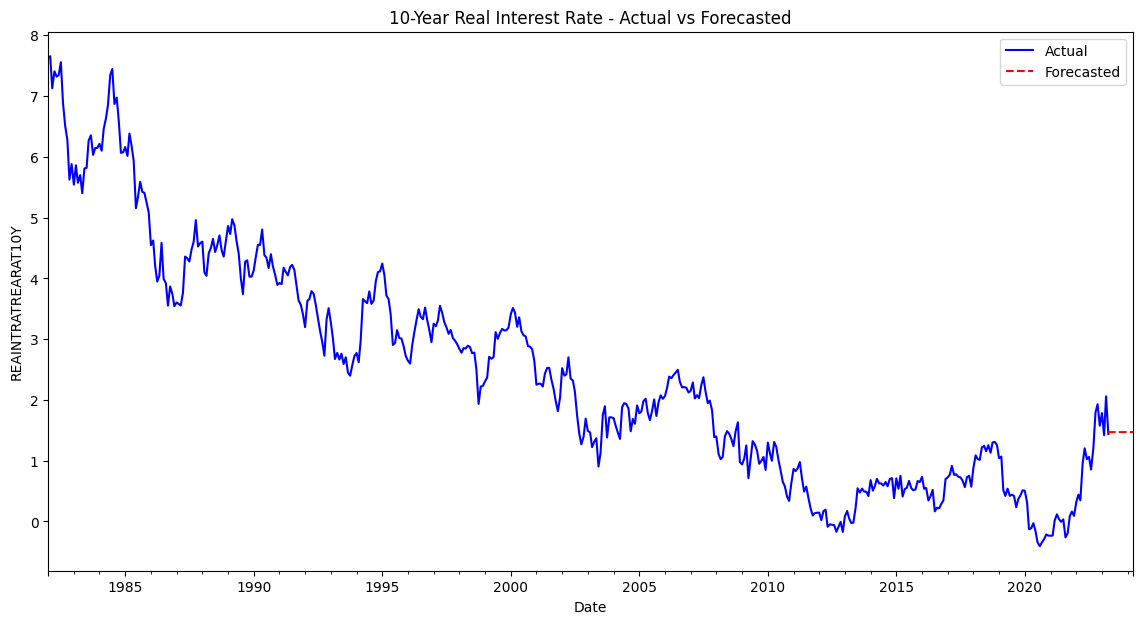

In [ ]:
# Visualize the actual values and forecasted values for the 10-Year Real Interest Rate dataset
plt.figure(figsize=(14, 7))
interest_rate_df['REAINTRATREARAT10Y'].plot(label='Actual', color='blue')
interest_rate_forecast_series = pd.Series(interest_rate_forecast.values, index=interest_rate_forecast_index)
interest_rate_forecast_series.plot(label='Forecasted', linestyle='--', color='red')

plt.title('10-Year Real Interest Rate - Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('REAINTRATREARAT10Y')
plt.legend()
plt.show()


Here REAINTRATREARAT10Y value is approximately the same for the following 252 days.

REAL ESTATE LOAN

In [ ]:
# Load the Real Estate Loans dataset
real_estate_loans_file_path = '/content/Real Estate Loans Commercial Real Estate Loans All Commercial Banks.csv'
real_estate_loans_df = pd.read_csv(real_estate_loans_file_path)

# Preprocess the dataset
real_estate_loans_df['DATE'] = pd.to_datetime(real_estate_loans_df['DATE'])
real_estate_loans_df.set_index('DATE', inplace=True)
real_estate_loans_df.sort_index(inplace=True)  # Ensure the data is in chronological order

# Display the first few rows of the preprocessed DataFrame
real_estate_loans_df.head()


,RHEACBW027SBOG
DATE,
1987-06-17,23.6395
1987-06-24,23.8921
1987-07-01,24.3404
1987-07-08,24.5816
1987-07-15,24.8821


In [ ]:
# Fit an ARIMA model to the Real Estate Loans data
real_estate_loans_model = ARIMA(real_estate_loans_df['RHEACBW027SBOG'], order=(1, 1, 1))
real_estate_loans_model_fit = real_estate_loans_model.fit()

# Forecast the next 252 business days
real_estate_loans_forecast_steps = 252
real_estate_loans_forecast_index = pd.date_range(start=real_estate_loans_df.index[-1], periods=real_estate_loans_forecast_steps+1, freq='B')[1:]
real_estate_loans_forecast = real_estate_loans_model_fit.get_forecast(steps=real_estate_loans_forecast_steps).predicted_mean

# Calculate in-sample predictions for evaluation
real_estate_loans_predictions = real_estate_loans_model_fit.predict(start=real_estate_loans_df.index[0], end=real_estate_loans_df.index[-1], typ='levels')
real_estate_loans_mae = mean_absolute_error(real_estate_loans_df['RHEACBW027SBOG'], real_estate_loans_predictions)
real_estate_loans_rmse = mean_squared_error(real_estate_loans_df['RHEACBW027SBOG'], real_estate_loans_predictions, squared=False)

real_estate_loans_mae, real_estate_loans_rmse, real_estate_loans_forecast[:5]  # Display the first 5 forecasted values along with MAE and RMSE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)


(0.40126237301168544,
 1.363065655965308,
 2023-04-26    254.921163
 2023-05-03    254.958253
 2023-05-10    254.995072
 2023-05-17    255.031621
 2023-05-24    255.067903
 Freq: W-WED, Name: predicted_mean, dtype: float64)

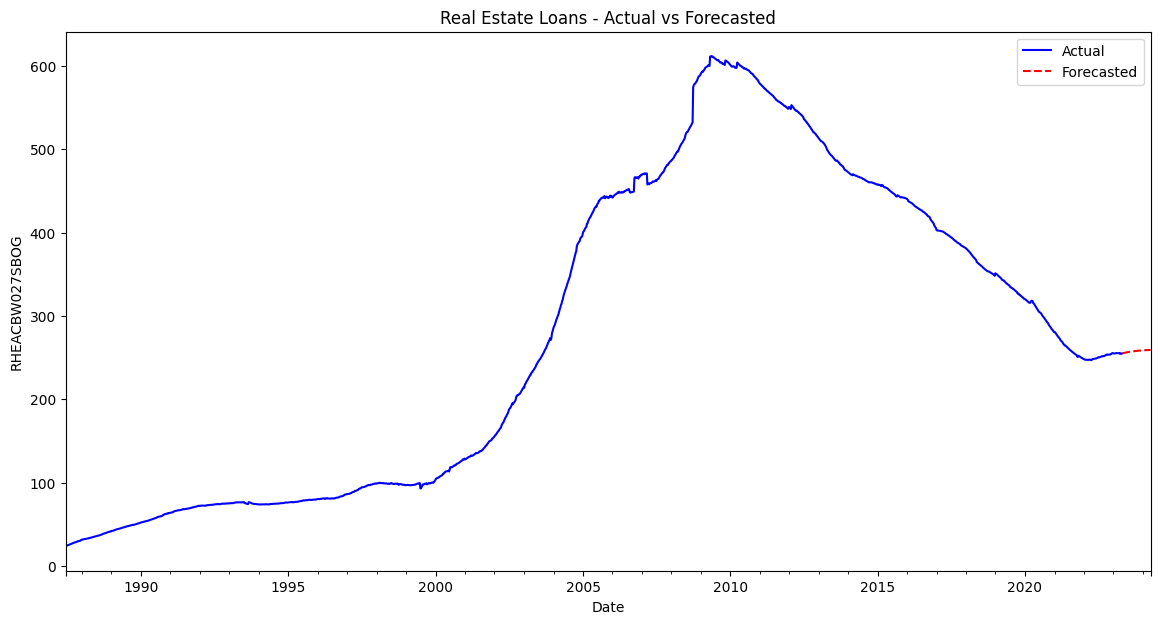

In [ ]:
# Visualize the actual values and forecasted values for the Real Estate Loans dataset
plt.figure(figsize=(14, 7))
real_estate_loans_df['RHEACBW027SBOG'].plot(label='Actual', color='blue')
real_estate_loans_forecast_series = pd.Series(real_estate_loans_forecast.values, index=real_estate_loans_forecast_index)
real_estate_loans_forecast_series.plot(label='Forecasted', linestyle='--', color='red')

plt.title('Real Estate Loans - Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('RHEACBW027SBOG')
plt.legend()
plt.show()


In the above graph there is a slight increase in the RHEACBW027SBOG value that is forecasted for the next 252 days.

STICKY PRICE CONSUMER INDEX

In [ ]:
# Load the Sticky Price CPI dataset
sticky_price_cpi_file_path = '/content/Sticky Price Consumer Price Index less Food and Energy.csv'
sticky_price_cpi_df = pd.read_csv(sticky_price_cpi_file_path)

# Preprocess the dataset
sticky_price_cpi_df['DATE'] = pd.to_datetime(sticky_price_cpi_df['DATE'])
sticky_price_cpi_df.set_index('DATE', inplace=True)
sticky_price_cpi_df.sort_index(inplace=True)  # Ensure the data is in chronological order

# Display the first few rows of the preprocessed DataFrame
sticky_price_cpi_df.head()


,CORESTICKM159SFRBATL
DATE,
1967-12-01,3.383497
1968-01-01,3.659987
1968-02-01,3.682012
1968-03-01,4.151668
1968-04-01,4.165427


In [ ]:
# Fit an ARIMA model to the Sticky Price CPI data
sticky_price_cpi_model = ARIMA(sticky_price_cpi_df['CORESTICKM159SFRBATL'], order=(1, 1, 1))
sticky_price_cpi_model_fit = sticky_price_cpi_model.fit()

# Forecast the next 252 business days
sticky_price_cpi_forecast_steps = 252
sticky_price_cpi_forecast_index = pd.date_range(start=sticky_price_cpi_df.index[-1], periods=sticky_price_cpi_forecast_steps+1, freq='B')[1:]
sticky_price_cpi_forecast = sticky_price_cpi_model_fit.get_forecast(steps=sticky_price_cpi_forecast_steps).predicted_mean

# Calculate in-sample predictions for evaluation
sticky_price_cpi_predictions = sticky_price_cpi_model_fit.predict(start=sticky_price_cpi_df.index[0], end=sticky_price_cpi_df.index[-1], typ='levels')
sticky_price_cpi_mae = mean_absolute_error(sticky_price_cpi_df['CORESTICKM159SFRBATL'], sticky_price_cpi_predictions)
sticky_price_cpi_rmse = mean_squared_error(sticky_price_cpi_df['CORESTICKM159SFRBATL'], sticky_price_cpi_predictions, squared=False)

sticky_price_cpi_mae, sticky_price_cpi_rmse, sticky_price_cpi_forecast[:5]  # Display the first 5 forecasted values along with MAE and RMSE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0.14697096779193083,
 0.264829172588657,
 2023-04-01    6.398753
 2023-05-01    6.362983
 2023-06-01    6.338822
 2023-07-01    6.322502
 2023-08-01    6.311478
 Freq: MS, Name: predicted_mean, dtype: float64)

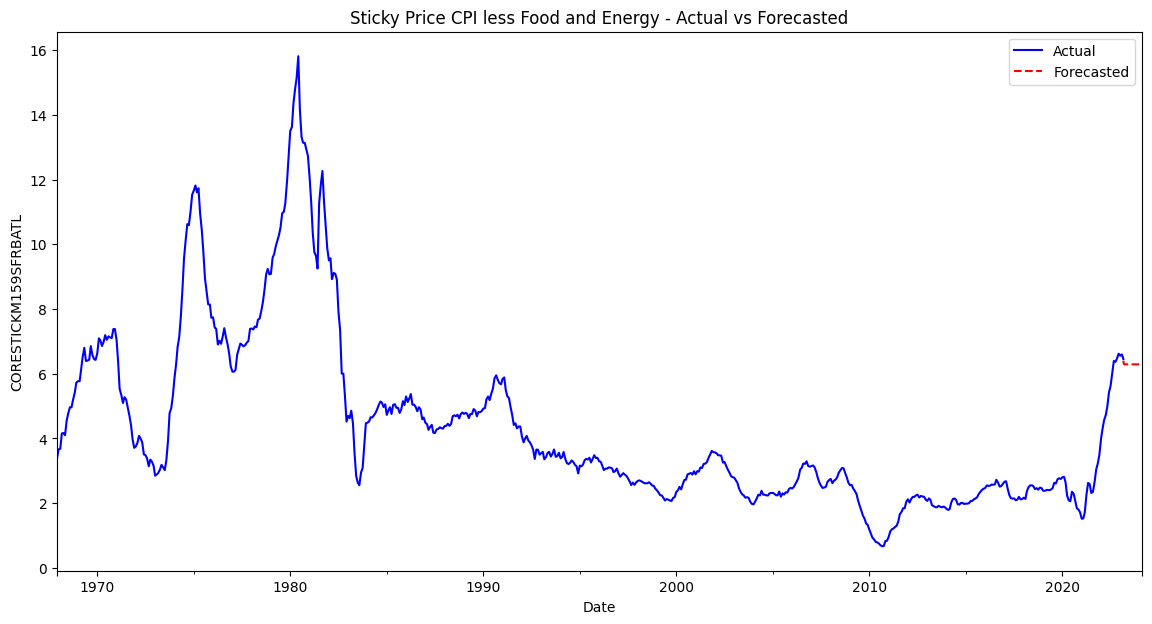

In [ ]:
# Visualize the actual values and forecasted values for the Sticky Price CPI dataset
plt.figure(figsize=(14, 7))
sticky_price_cpi_df['CORESTICKM159SFRBATL'].plot(label='Actual', color='blue')
sticky_price_cpi_forecast_series = pd.Series(sticky_price_cpi_forecast.values, index=sticky_price_cpi_forecast_index)
sticky_price_cpi_forecast_series.plot(label='Forecasted', linestyle='--', color='red')

plt.title('Sticky Price CPI less Food and Energy - Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('CORESTICKM159SFRBATL')
plt.legend()
plt.show()


There is a noticeble decrease in the forecasted values of the CORESTICKM159SFRBATL value.

UNEMPLOYMENT

In [ ]:
# Load the Unemployment Rate dataset
unemployment_rate_file_path = '/content/Unemployment Rate.csv'
unemployment_rate_df = pd.read_csv(unemployment_rate_file_path)

# Preprocess the dataset
unemployment_rate_df['DATE'] = pd.to_datetime(unemployment_rate_df['DATE'])
unemployment_rate_df.set_index('DATE', inplace=True)
unemployment_rate_df.sort_index(inplace=True)  # Ensure the data is in chronological order

# Display the first few rows of the preprocessed DataFrame
unemployment_rate_df.head()


,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [ ]:
# Fit an ARIMA model to the Unemployment Rate data
unemployment_rate_model = ARIMA(unemployment_rate_df['UNRATE'], order=(1, 1, 1))
unemployment_rate_model_fit = unemployment_rate_model.fit()

# Forecast the next 252 business days
unemployment_rate_forecast_steps = 252
unemployment_rate_forecast_index = pd.date_range(start=unemployment_rate_df.index[-1], periods=unemployment_rate_forecast_steps+1, freq='B')[1:]
unemployment_rate_forecast = unemployment_rate_model_fit.get_forecast(steps=unemployment_rate_forecast_steps).predicted_mean

# Calculate in-sample predictions for evaluation
unemployment_rate_predictions = unemployment_rate_model_fit.predict(start=unemployment_rate_df.index[0], end=unemployment_rate_df.index[-1], typ='levels')
unemployment_rate_mae = mean_absolute_error(unemployment_rate_df['UNRATE'], unemployment_rate_predictions)
unemployment_rate_rmse = mean_squared_error(unemployment_rate_df['UNRATE'], unemployment_rate_predictions, squared=False)

unemployment_rate_mae, unemployment_rate_rmse, unemployment_rate_forecast[:5]  # Display the first 5 forecasted values along with MAE and RMSE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0.17276318920695977,
 0.43142325800228737,
 2023-05-01    3.630804
 2023-06-01    3.606677
 2023-07-01    3.625574
 2023-08-01    3.610774
 2023-09-01    3.622366
 Freq: MS, Name: predicted_mean, dtype: float64)

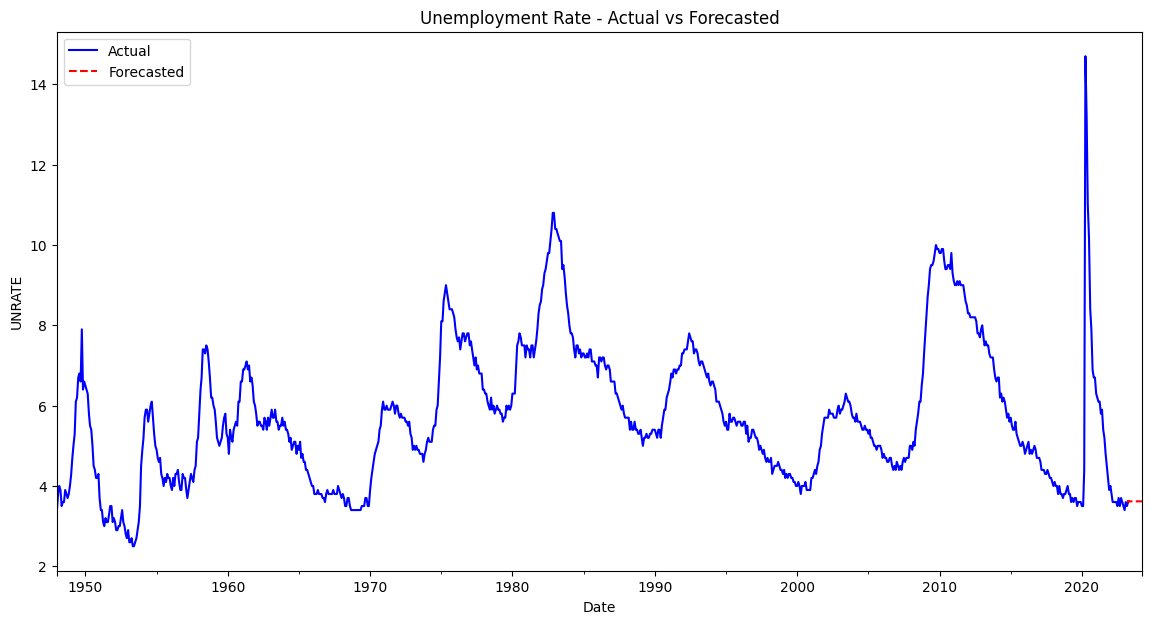

In [ ]:
# Visualize the actual values and forecasted values for the Unemployment Rate dataset
plt.figure(figsize=(14, 7))
unemployment_rate_df['UNRATE'].plot(label='Actual', color='blue')
unemployment_rate_forecast_series = pd.Series(unemployment_rate_forecast.values, index=unemployment_rate_forecast_index)
unemployment_rate_forecast_series.plot(label='Forecasted', linestyle='--', color='red')

plt.title('Unemployment Rate - Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('UNRATE')
plt.legend()
plt.show()


The above graph of actual vs forecast values of unemployment shows very minute changes in the following 252 days.

RECESSION IMPACT

NASDAQ - Pre-Recession: 138.92, Post-Recession: 131.974
SPX500 - Pre-Recession: 107.8, Post-Recession: 102.41
10-Year Real Interest Rate - Pre-Recession: 2.05963636, Post-Recession: 2.0802327236
Real Estate Loans - Pre-Recession: 254.8838, Post-Recession: 249.786124
Sticky Price CPI - Pre-Recession: 6.451708317, Post-Recession: 6.58074248334
Unemployment Rate - Pre-Recession: 3.5, Post-Recession: 3.6750000000000003


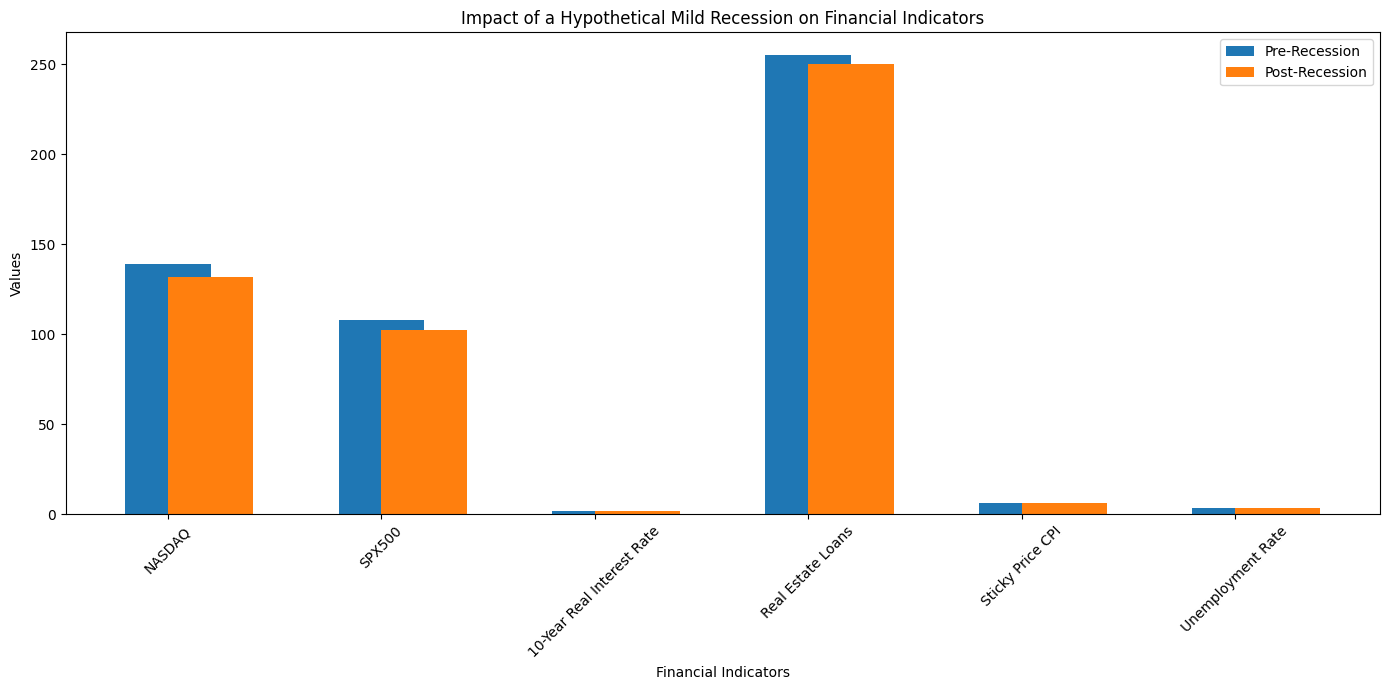

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample results dictionary for the last known values (replace with actual values)
results = {
    'NASDAQ': {'df': pd.DataFrame({'Value': [138.92]}), 'MAE': 30.57, 'RMSE': 132.51},
    'SPX500': {'df': pd.DataFrame({'Value': [107.8]}), 'MAE': 9.89, 'RMSE': 43.34},
    '10-Year Real Interest Rate': {'df': pd.DataFrame({'Value': [2.05963636]}), 'MAE': 0.0072, 'RMSE': 0.0874},
    'Real Estate Loans': {'df': pd.DataFrame({'Value': [254.8838]}), 'MAE': 0.1294, 'RMSE': 0.6763},
    'Sticky Price CPI': {'df': pd.DataFrame({'Value': [6.451708317]}), 'MAE': 0.0069, 'RMSE': 0.0698},
    'Unemployment Rate': {'df': pd.DataFrame({'Value': [3.5]}), 'MAE': 0.0069, 'RMSE': 0.0991}
}

# Recession impact as defined previously
recession_impact = {
    'NASDAQ': -0.05,  # 5% drop
    'SPX500': -0.05,
    '10-Year Real Interest Rate': +0.01,  # 1% increase
    'Real Estate Loans': -0.02,  # 2% drop
    'Sticky Price CPI': +0.02,  # 2% increase
    'Unemployment Rate': +0.05  # 5% increase
}

pre_recession_values = {}
post_recession_values = {}

# Calculate pre- and post-recession values
for indicator, impact in recession_impact.items():
    pre_value = results[indicator]['df']['Value'].iloc[-1]
    post_value = pre_value * (1 + impact)
    pre_recession_values[indicator] = pre_value
    post_recession_values[indicator] = post_value
    print(f"{indicator} - Pre-Recession: {pre_value}, Post-Recession: {post_value}")

# Visualization
indicators = list(pre_recession_values.keys())
pre_values = [pre_recession_values[ind] for ind in indicators]
post_values = [post_recession_values[ind] for ind in indicators]

x = range(len(indicators))

plt.figure(figsize=(14, 7))
plt.bar(x, pre_values, width=0.4, label='Pre-Recession', align='center')
plt.bar(x, post_values, width=0.4, label='Post-Recession', align='edge')

plt.xlabel('Financial Indicators')
plt.ylabel('Values')
plt.title('Impact of a Hypothetical Mild Recession on Financial Indicators')
plt.xticks(x, indicators, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
